# **Data Science Work Prompt**


In [ ]:
#Importing all library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [ ]:
# connecting Drive to upload dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/velocity.csv')

In [ ]:
df.head(5)

,User ID,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent)
0,U001,5,80,3,10,120,20
1,U002,8,60,1,8,100,35
2,U003,3,90,0,6,90,5
3,U004,7,70,2,15,140,40
4,U005,2,50,5,3,60,8


# **EDA-Exploratary Data Analysis**

Knowing Data and preprocessing
 **The data is very small with no missing and duplicate values**

In [ ]:
df.shape

(100, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   User ID                                  100 non-null    object
 1   Fan Challenges Completed                 100 non-null    int64 
 2   Predictive Accuracy (%)                  100 non-null    int64 
 3   Virtual Merchandise Purchases            100 non-null    int64 
 4   Sponsorship Interactions (Ad Clicks)     100 non-null    int64 
 5   Time on Live 360 (mins)                  100 non-null    int64 
 6   Real-Time Chat Activity (Messages Sent)  100 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 5.6+ KB


In [ ]:
df.isna().sum()

,0
User ID,0
Fan Challenges Completed,0
Predictive Accuracy (%),0
Virtual Merchandise Purchases,0
Sponsorship Interactions (Ad Clicks),0
Time on Live 360 (mins),0
Real-Time Chat Activity (Messages Sent),0


In [ ]:
df.dtypes

,0
User ID,object
Fan Challenges Completed,int64
Predictive Accuracy (%),int64
Virtual Merchandise Purchases,int64
Sponsorship Interactions (Ad Clicks),int64
Time on Live 360 (mins),int64
Real-Time Chat Activity (Messages Sent),int64


In [ ]:
# droping duplicates if present
df=df.drop_duplicates()

In [ ]:
# no duplicates in the Data
df.shape

(100, 7)

<Axes: xlabel='Virtual Merchandise Purchases', ylabel='Time on Live 360 (mins)'>

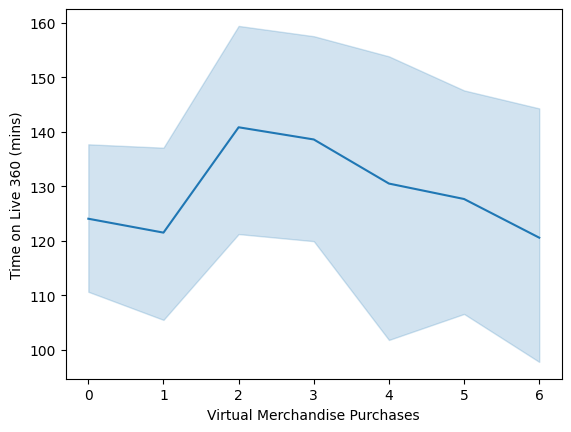

In [ ]:
#Understanding the relationship of time live and virtual merchandise purchases
#The more minutes a user watches Live 360, the higher the chances that the user will buy virtual merchandise
sns.lineplot(x=df['Virtual Merchandise Purchases'],y=df['Time on Live 360 (mins)'])

In [ ]:
# Droping Non numeric values for correlation and heatmap
df1=df.drop('User ID',axis=1)

In [ ]:
# lets check the correlation of every column of the data with other columns
df_corr=df1.corr()

# **Correlation Findings**
 **Fan challenges Completed** moderately correlated with v**irtual Merchandise Purchases**. That means user who are taking more number of fan challenges are more likely to purchase virtual

**Sponsorship Interactions** is moderately correlated with **virtual Merchandise Purchases**. Which Means user interacting with more


<Axes: >

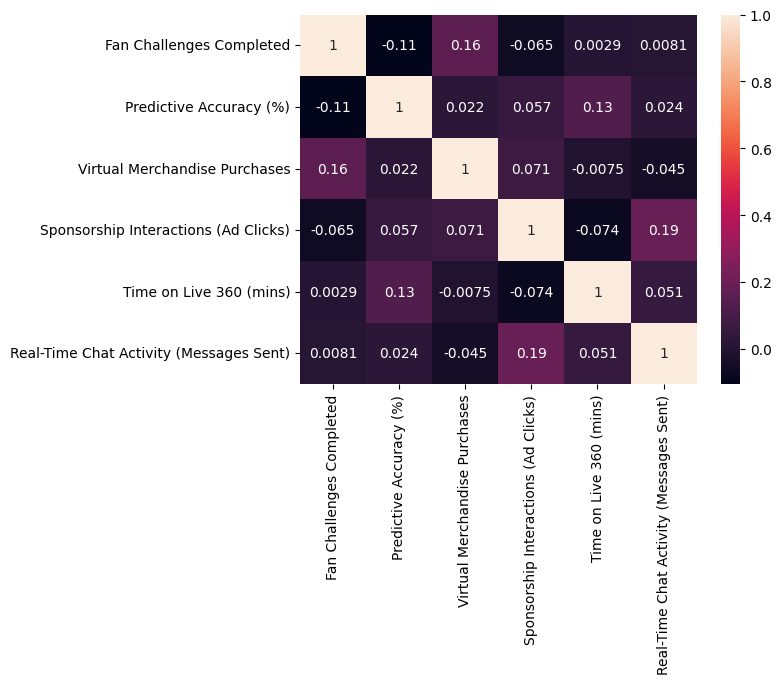

In [ ]:
sns.heatmap(df_corr, annot=True)

# **Implementation of K-means Clustering to Create Clusters for Different User Segments**

K-means clustering is an unsupervised machine learning algorithm. The purpose of K-means clustering is to create clusters of data points that are similar to each other.

In terms of this project, I have made 3 clusters which are as follows:

**Cluster 1** - Users who are highly engaged in fan challenges and sponsorship interactions but have low accuracy.

**Cluster 2**- Users spending a lot of time on live 360 and are active in real chat.

**Cluster 3** - Users purchasing virtual merchandise and have high accuracy.



In [ ]:
features = df1[['Fan Challenges Completed', 'Predictive Accuracy (%)', 'Sponsorship Interactions (Ad Clicks)',
                 'Time on Live 360 (mins)', 'Real-Time Chat Activity (Messages Sent)']]

# before k-mean implementation standardizing data for better results
s = StandardScaler()
scaled_features = s.fit_transform(features)


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
# creating a new column for clusters
df1['Cluster'] = clusters


# **Insights from K-mean Clustering**
Cluster Profiling is used to tell the distribution of user in each clusters .Cluster 0 has 19 users ,Cluster 1 has 37 and cluster 2 have 44

The Cluster profling Clearly Shows that cluster 2 has the most number of purshase and Company should focus on this user for maxmimum profit



In [ ]:
cluster_profile = df1.groupby('Cluster').mean()

cluster_profile['Cluster Size'] = df['Cluster'].value_counts().sort_index()
print(cluster_profile)


         Fan Challenges Completed  Predictive Accuracy (%)  \
Cluster                                                      
0                        4.421053                70.894737   
1                        6.378378                81.243243   
2                        5.886364                71.500000   

         Virtual Merchandise Purchases  Sponsorship Interactions (Ad Clicks)  \
Cluster                                                                        
0                             2.157895                             15.684211   
1                             2.810811                              5.027027   
2                             2.772727                              8.727273   

         Time on Live 360 (mins)  Real-Time Chat Activity (Messages Sent)  \
Cluster                                                                     
0                     153.052632                                38.368421   
1                     158.513514                         

# **Visualizing how clusters are formed**
The cluster formed are not perfect but decent .The cluster are well defined and distinct from other clusters

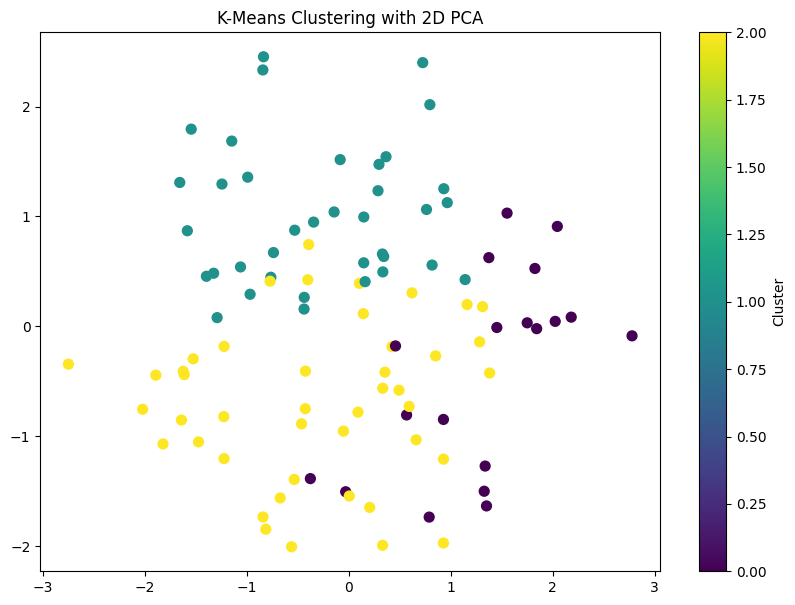

In [ ]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)


plt.figure(figsize=(10, 7))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=df1['Cluster'], cmap='viridis', s=50)
plt.title('K-Means Clustering with 2D PCA')
plt.colorbar(label='Cluster')
plt.show()


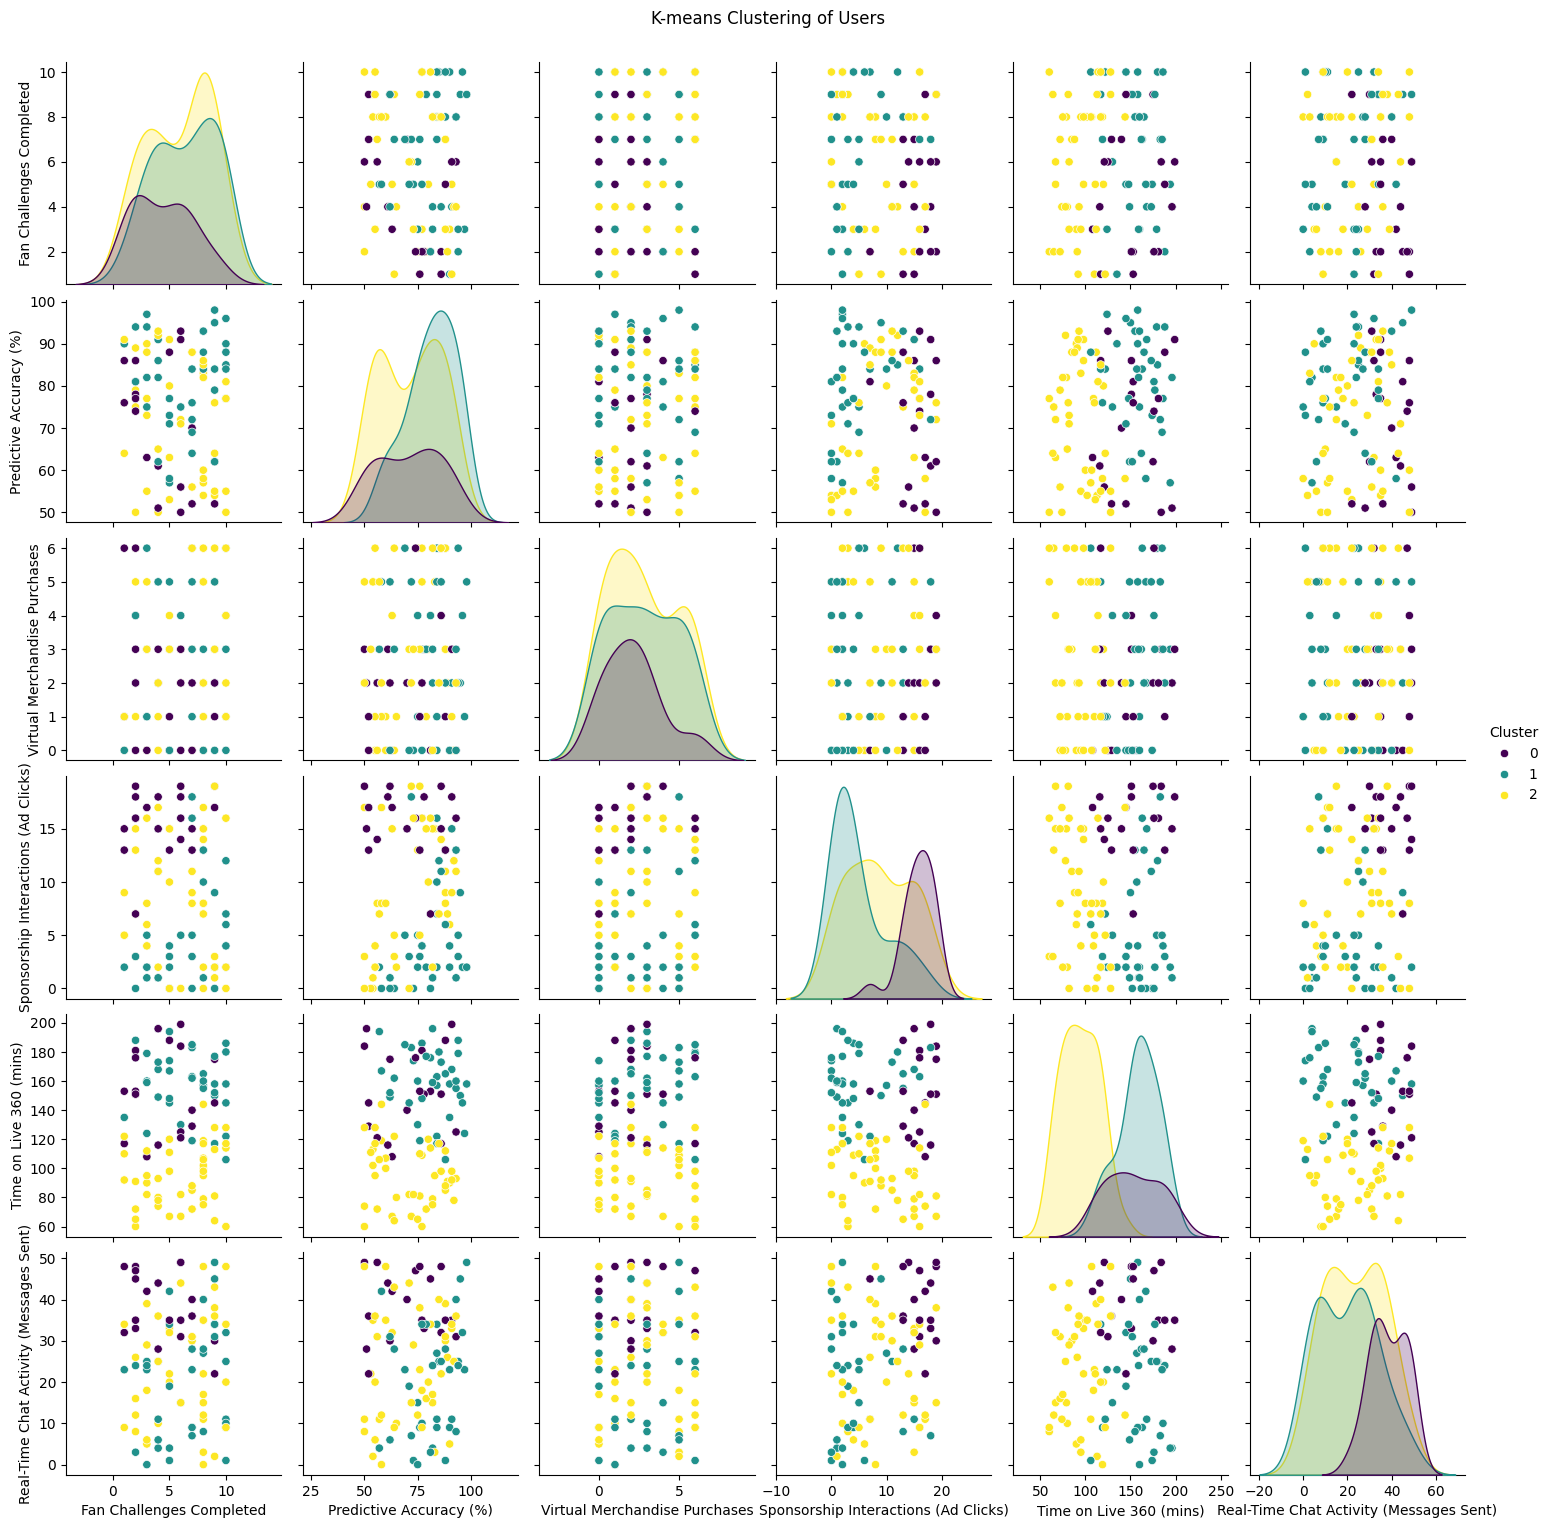

In [ ]:
# visulizing all the clusters with respect to each column of the data
sns.pairplot(df1, hue='Cluster', palette='viridis')
plt.suptitle('K-means Clustering of Users', y=1.02)
plt.show()

In [ ]:
df

,User ID,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent),Cluster
0,U001,5,80,3,10,120,20,2
1,U002,8,60,1,8,100,35,2
2,U003,3,90,0,6,90,5,2
3,U004,7,70,2,15,140,40,0
4,U005,2,50,5,3,60,8,2
...,...,...,...,...,...,...,...,...
95,U096,8,86,6,14,98,22,2
96,U097,3,82,3,1,159,24,1
97,U098,1,91,1,9,92,34,2
98,U099,8,93,0,1,160,40,1


# **Applying Predictive Model to Identify Users Who Are Most Likely to Purchase Virtual Merchandise**
To identify users who are most likely to purchase virtual merchandise, **I used  Random Forest Classifier.**

**Reasons to Use Random Forest Classifier**

- Random Forest is one of the best models for identifying relationships in data, as it builds multiple decision trees and averages their results.
- This model provides insights for each column of the data while making predictions.
- Random Forest also reduces the possibilities of overfitting and underfitting.
# **Key Findings**

- Users who are more engaged in fan base challenges are more likely to purchase virtual merchandise.

- Similarly, users who utilize chatbots are also more likely to purchase virtual merchandise.

-  Company should focus on users who interact more with fan challenges and chat with bots, as well as those spending time watching live 360 content.

- The company can create targeted ads for these users. Additionally, increasing the number of fan challenges could encourage more interaction and ultimately lead to more purchases of virtual merchandise.

In [ ]:
# Splitting the data into training and testing for more better performance of the model
X = df[['Fan Challenges Completed', 'Predictive Accuracy (%)', 'Sponsorship Interactions (Ad Clicks)',
          'Time on Live 360 (mins)', 'Real-Time Chat Activity (Messages Sent)']]
y = df['Virtual Merchandise Purchases'] > 0


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)



# **Splitting Data**
The data contains 80% of users who have bought merchandise and 20% of users who have not. To improve model performance, it is important to maintain a good proportion of users who have bought and who have not in both the training and testing sets.To achieve this balanced split, stratified sampling is used with the stratify parameter in train_test_split, which ensures that the same proportion of users who have bought and who have not bought merchandise is maintained in both training and testing sets

In [ ]:
y_test.value_counts(normalize=True)


,proportion
Virtual Merchandise Purchases,
True,0.8
False,0.2


In [ ]:
y_train.value_counts(normalize=True)


,proportion
Virtual Merchandise Purchases,
True,0.8
False,0.2


# **Model Performance**
The model is performing very well with Precision of about 78%, Recall 88 percent and f1 score of about 82 percent

Then main reason for good performance of the model is the **size of data**.The size of the data is very small and model is easly memorizing the training data which leads to high accuracy of the model.Small test size can also lead to misleading values

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.00      0.00      0.00         6
        True       0.78      0.88      0.82        24

    accuracy                           0.70        30
   macro avg       0.39      0.44      0.41        30
weighted avg       0.62      0.70      0.66        30



In [ ]:
rf.feature_importances_

array([0.14604765, 0.28228902, 0.18693527, 0.22448911, 0.16023895])

In [ ]:
X_train.columns

Index(['Fan Challenges Completed', 'Predictive Accuracy (%)',
       'Sponsorship Interactions (Ad Clicks)', 'Time on Live 360 (mins)',
       'Real-Time Chat Activity (Messages Sent)'],
      dtype='object')

In [ ]:
importances = rf.feature_importances_

# **Important Features**

I am trying to show the most important feature in terms of buying merchandise.As stated earlier user with more **time spend on live 360** have greater chance to buy virtual merchandise.Followed by **Real time chat activity** and **fan challenges**

<ipython-input-170-fe7de7e3d288>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=df_imp, palette='viridis')


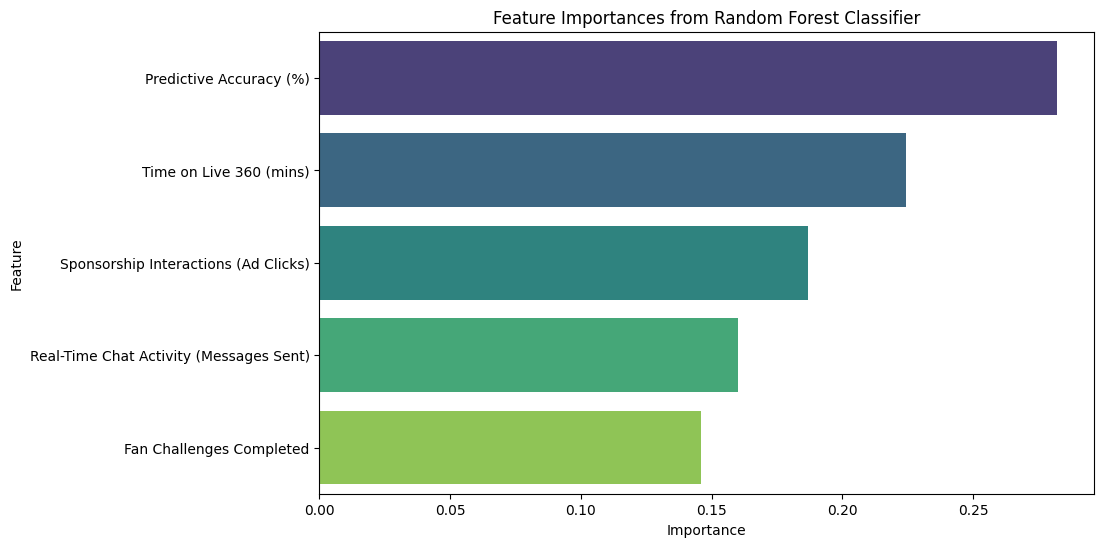

In [ ]:
feature_names = X.columns
df_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})


df_imp = df_imp.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=df_imp, palette='viridis')
plt.title('Feature Importances from Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# **Conclusion and Insights**
The VeloCityX dataset contains **100 rows and 7 columns**, including user interaction metrics such as:

User ID

Fan Challenges Completed

Predictive Accuracy in Challenges

Virtual Merchandise Purchases

Sponsorship Interactions (Ad Views, Click-Through Rates)

Time Spent on "Live 360" Coverage

Real-Time Chat Activity

The data has **no missing** or **duplicate values**, requiring minimal data cleaning and preprocessing.

# **K-means Clustering**
After applying the K-means clustering algorithm, three distinct clusters were formed. Cluster profiling revealed that users in Cluster 2 have purchased more merchandise, spent more time watching "Live 360" coverage, and interacted more with the chatbot.

**Recommendation:** VeloCityX should focus on users who spend more time on "Live 360" and interact more with the chatbot, as they are more likely to purchase merchandise.

# **Predictive Modeling**
To predict whether a particular user will purchase merchandise, a Random Forest Classifier was employed. The data was split into training and testing sets to optimize model performance. The model demonstrated that users who spend more time watching Live 360 and click on sponsor ads have a higher likelihood of purchasing merchandise.

Interesting insights emerged when analyzing the important features related to the target variable. It was found that the most significant feature influencing merchandise purchases is the **prediction accuracy** associated with fan challenge participation. **The top three important features identified are prediction accuracy, live 360 engagement, and ad clicks**

A detailed report of this project is uploaded on GitHub


**The model can be misleading, as the data size is very small. For the best results, the data provided to the model should be large enough for it to learn effectively.**

## **Proposed New Challenge for User Engagement: "Live 360 Fan Quest"**
Based on our analysis, users who spend more time watching Live 360 are more likely to purchase virtual merchandise. To capitalize on this insight, VeloCityX can introduce a new interactive game called **Live 360 Fan Quest**.

**Challenge Description:**
Live 360 Fan Quest is designed to engage users by integrating challenges and real-time quizzes during Live 360 coverage. This will enhance the viewing experience and significantly boost user engagement
According to my analysis, users spending more time watching live 360 end up buying virtual merchandise. So virtualX can introduce a new game called live 360 fan quest where user can play challenges or real time quiz while watching live 360 this can increase user engagement in a large manner. The company can run ads for the same which will increase more users. By this the company has a chance to increase their sales of merchandise. This can be a targeted engagement and can help the company in the long run

# **Key Features:**
**Real-Time Quizzes:**

Users answer quiz questions related to the race, drivers, and teams during Live 360 coverage.
Points are awarded for correct answers, and a real-time leaderboard keeps users competitive.

**Interactive Polls:**

Users participate in polls about ongoing race scenarios, such as predicting the next pit stop or driver duel outcomes.
Instant poll results foster a sense of community and shared excitement

This challenge will increase **user engagement** as according to my analysis, Live 360 is the most important feature. The challenge will also help in **increasing the sales** of virtual merchandise.






